In [25]:
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array

import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from PIL import Image

import os

In [2]:
training_path = '/content/drive/MyDrive/Intel image classification/training'
testing_path = '/content/drive/MyDrive/Intel image classification/testing'

forest
Shape of image (150, 150, 3)


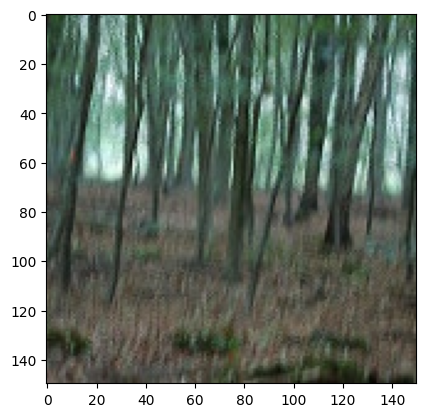

mountain
Shape of image (150, 150, 3)


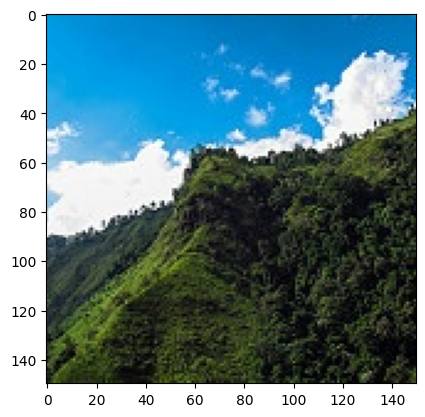

glacier
Shape of image (150, 150, 3)


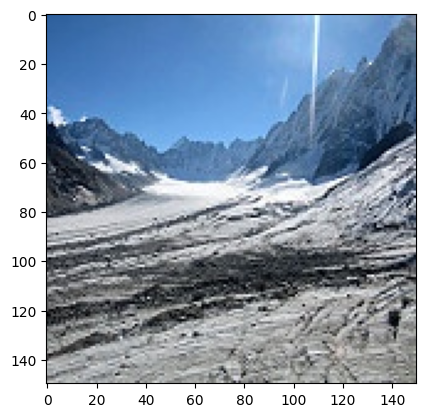

street
Shape of image (150, 150, 3)


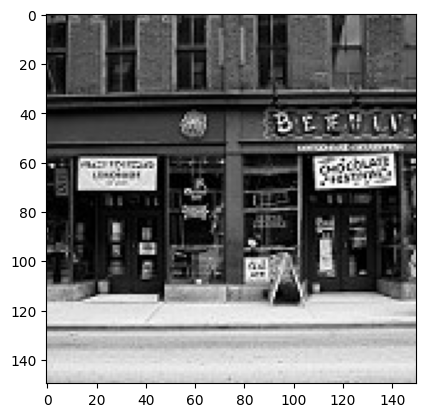

sea
Shape of image (150, 150, 3)


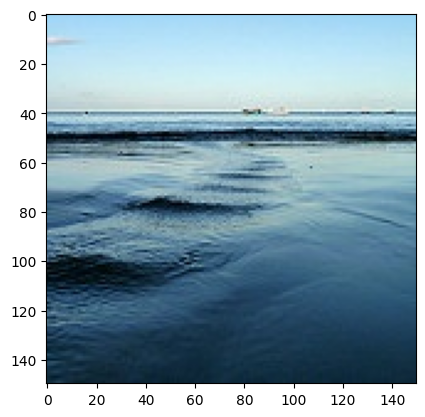

buildings
Shape of image (150, 150, 3)


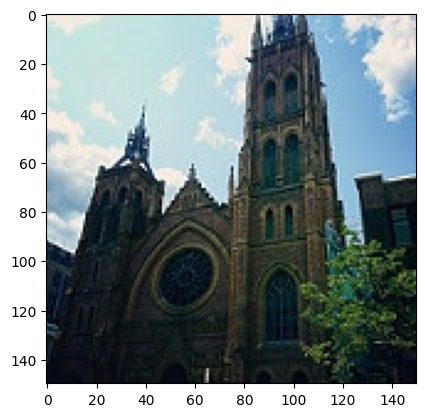

In [5]:
for pictype in os.listdir(training_path):
    img_path = os.path.join(training_path, pictype)
    print(pictype)

    for img in os.listdir(img_path):
        img_array = mpimg.imread(os.path.join(img_path, img))
        print('Shape of image', img_array.shape)
        plt.imshow(img_array)
        plt.show()
        break

In [6]:
image_size = (150, 150)
batch_size = 32


In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  zoom_range = 0.2,
                                  shear_range = 0.2,
                                  horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(training_path,
                                                   target_size = image_size,
                                                   batch_size = batch_size,
                                                   class_mode = 'categorical',
                                                   shuffle = True,
                                                   seed = 10)

Found 1200 images belonging to 6 classes.


In [8]:
label = train_generator.class_indices
label = dict((v,k) for k,v in label.items())
label

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

In [20]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                                                    testing_path,
                                                    target_size = image_size,
                                                    classes = ['test'],
                                                    batch_size = batch_size
                                                  )

Found 100 images belonging to 1 classes.


In [10]:
model = keras.Sequential([

    layers.Conv2D(filters = 200, kernel_size = 3, activation = 'relu', input_shape = (image_size[0], image_size[1], 3)),
    layers.Conv2D(filters = 150, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 4, padding = 'same'),

    layers.Conv2D(filters = 120, kernel_size = 3, activation = 'relu'),
    layers.Conv2D(filters = 80, kernel_size = 3, activation = 'relu'),
    layers.Conv2D(filters = 50, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 4, padding = 'same'),

    layers.Flatten(),

    layers.Dense(units = 120, activation = 'relu'),
    layers.Dense(units = 100, activation = 'relu'),
    layers.Dense(units = 50, activation = 'relu'),

    layers.Dropout(0.5),
    layers.Dense(units = 6, activation = 'softmax')

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 200)     5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 150)     270150    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 150)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 35, 35, 120)       162120    
                                                                 
 conv2d_3 (Conv2D)           (None, 33, 33, 80)        86480     
                                                                 
 conv2d_4 (Conv2D)           (None, 31, 31, 50)        36050     
                                                        

In [11]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
#ran over 120 epochs
hist = model.fit(train_generator, epochs = 20)

Epoch 1/20
38/38 [==============================] - 16s 406ms/step - loss: 0.6139 - accuracy: 0.7817
Epoch 2/20
38/38 [==============================] - 12s 319ms/step - loss: 0.6050 - accuracy: 0.7908
Epoch 3/20
38/38 [==============================] - 13s 322ms/step - loss: 0.6039 - accuracy: 0.7875
Epoch 4/20
38/38 [==============================] - 19s 511ms/step - loss: 0.5786 - accuracy: 0.8042
Epoch 5/20
38/38 [==============================] - 16s 415ms/step - loss: 0.6112 - accuracy: 0.7842
Epoch 6/20
38/38 [==============================] - 14s 362ms/step - loss: 0.5461 - accuracy: 0.7992
Epoch 7/20
38/38 [==============================] - 20s 510ms/step - loss: 0.5550 - accuracy: 0.8100
Epoch 8/20
38/38 [==============================] - 16s 411ms/step - loss: 0.5364 - accuracy: 0.8017
Epoch 9/20
38/38 [==============================] - 17s 437ms/step - loss: 0.6357 - accuracy: 0.7875
Epoch 10/20
38/38 [==============================] - 13s 343ms/step - loss: 0.6380 - accura

In [19]:
model.save('intel_image_cnn.h5')

In [21]:
for data_batch in test_generator:
  pred = model.predict(data_batch[0])
  pred_indices = np.argmax(pred, axis = 1)
  break

1/1 [==============================] - 0s 35ms/step


In [22]:
pred_indices

array([3, 0, 5, 2, 3, 3, 3, 2, 1, 5, 4, 0, 1, 4, 1, 3, 1, 2, 1, 2, 5, 5,
       2, 3, 2, 5, 0, 5, 1, 5, 5, 4])

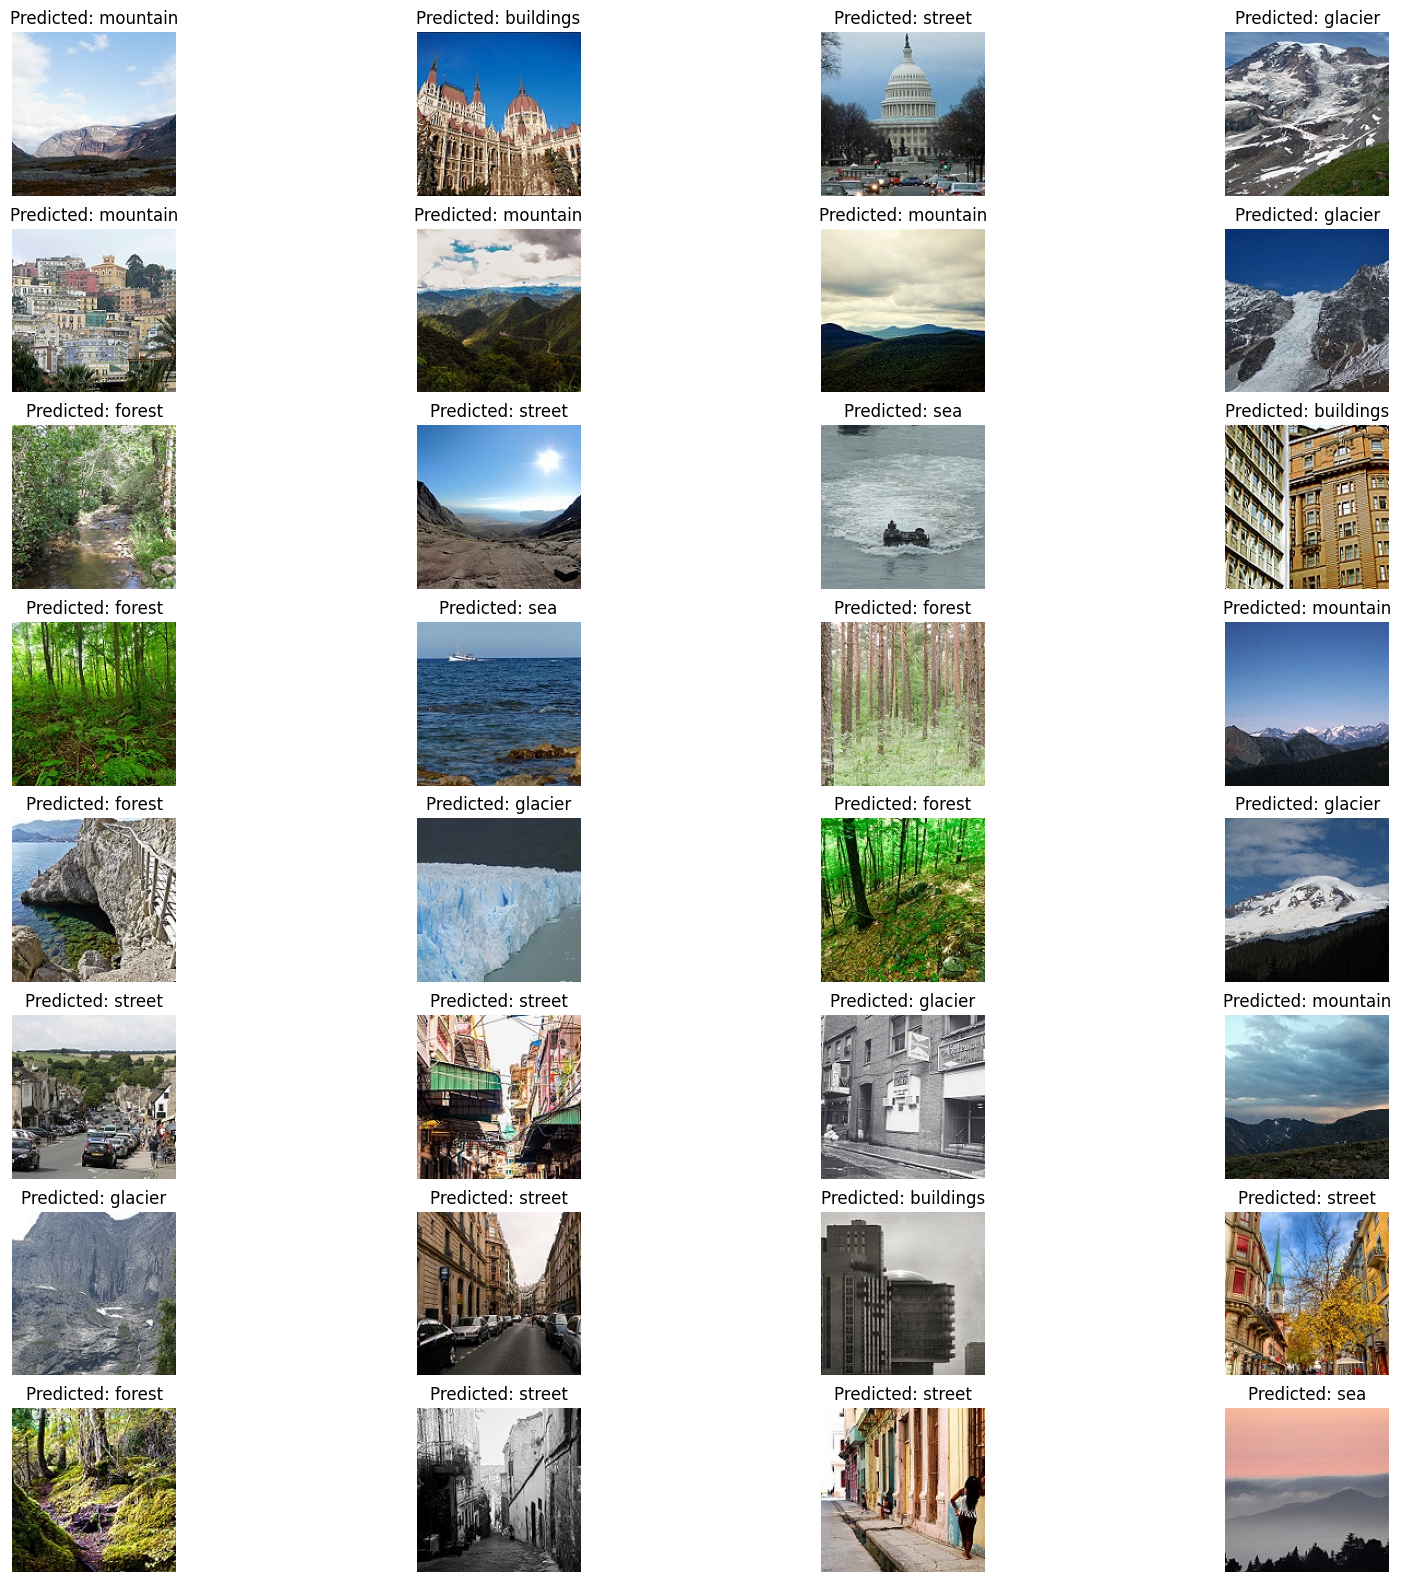

In [24]:
plt.figure(figsize = (20, 20))

for i in range(data_batch[0].shape[0]):
  plt.subplot(8, 4, i+1)
  pred_label = label[pred_indices[i]]
  plt.imshow(data_batch[0][i])
  plt.title(f'Predicted: {pred_label}')
  plt.axis('off')

In [26]:
def predict_image(path):

  img = load_img(path, target_size = (150, 150))
  img_array = img_to_array(img)
  img_array = img_array/255
  img_array = np.expand_dims(img_array, axis = 0)

  classes = model.predict([img_array])
  class_index = np.argmax(classes, axis = 1)[0]
  class_name = label[class_index]

  im = mpimg.imread(path)
  plt.imshow(im)
  print(f'Predicted class is {class_name}')




1/1 [==============================] - 1s 1s/step
Predicted class is street


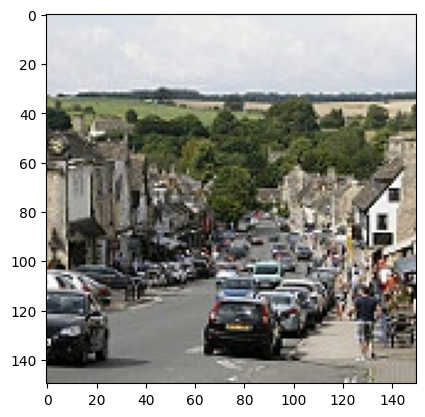

In [27]:
predict_image('/content/drive/MyDrive/Intel image classification/testing/test/10340.jpg')

1/1 [==============================] - 0s 36ms/step
Predicted class is buildings


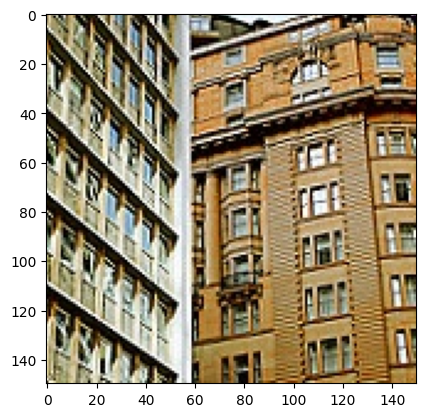

In [28]:
predict_image('/content/drive/MyDrive/Intel image classification/testing/test/10321.jpg')